Facteur de redimensionnement : 1, Temps d'exécution : 0.016285 secondes, Seuil : 187


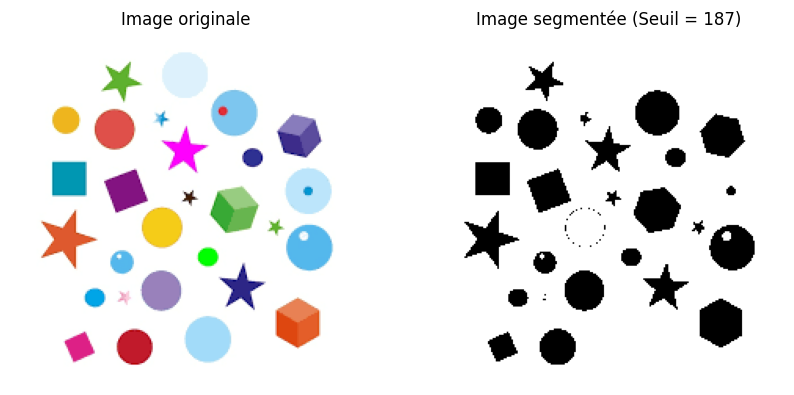

Facteur de redimensionnement : 5, Temps d'exécution : 0.301039 secondes, Seuil : 189
Facteur de redimensionnement : 10, Temps d'exécution : 1.086638 secondes, Seuil : 189
Facteur de redimensionnement : 15, Temps d'exécution : 2.580812 secondes, Seuil : 189
Facteur de redimensionnement : 20, Temps d'exécution : 4.790000 secondes, Seuil : 189
Facteur de redimensionnement : 25, Temps d'exécution : 7.068308 secondes, Seuil : 189
Facteur de redimensionnement : 30, Temps d'exécution : 10.409259 secondes, Seuil : 189


In [4]:
import cv2
import matplotlib.pyplot as plt
import time


def calculate_histogram(image):
    histogram = [0] * 256
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    return histogram

def otsu_thresholding(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    histogram = calculate_histogram(gray)
    total_pixels = gray.size
    current_max_variance = 0
    threshold = 0
    sum_all_pixels = sum(i * histogram[i] for i in range(256))
    sum_background = 0
    weight_background = 0
    for t in range(256):
        weight_background += histogram[t]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        sum_background += t * histogram[t]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_all_pixels - sum_background) / weight_foreground
        inter_class_variance = (
            weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        )
        if inter_class_variance > current_max_variance:
            current_max_variance = inter_class_variance
            threshold = t
    _, binary_image = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    return threshold, binary_image

def measure_execution_times_and_display(image_path, resize_factors, output_file):
    # Charger l'image
    original_image = cv2.imread(image_path)
    if original_image is None:
        print("Erreur : Impossible de charger l'image.")
        return
    results = []
    # Mesurer les temps d'exécution pour chaque facteur de redimensionnement
    for factor in resize_factors:
        resized_image = cv2.resize(
            original_image, 
            (original_image.shape[1] * factor, original_image.shape[0] * factor)
        )
        start_time = time.time()
        threshold, binary_image = otsu_thresholding(resized_image)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((factor, execution_time))
        print(f"Facteur de redimensionnement : {factor}, Temps d'exécution : {execution_time:.6f} secondes, Seuil : {threshold}")
        # Affichage
        if factor == 1:  
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.title("Image originale")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.title(f"Image segmentée (Seuil = {threshold})")
            plt.imshow(binary_image, cmap="gray")
            plt.axis("off")
            plt.show()

    # Sauvegarder les résultats dans un fichier
    with open(output_file, "w") as file:
        for factor, exec_time in results:
            file.write(f"Facteur de redimensionnement : {factor}, Temps d'exécution : {exec_time:.6f} secondes\n")

# Exemple d'utilisation
if __name__ == "__main__":
    image_path = "../../images.png"  
    resize_factors = [1, 5, 10, 15, 20, 25, 30]  
    output_file = "execution_times.txt" 
    measure_execution_times_and_display(image_path, resize_factors, output_file)
